In [126]:
import torch
import random
import os
import numpy as np
import pickle5 as pickle
from pathlib import Path
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils.dataloaders import MDSDataset, LipstickDataset, Birds_OneCluster, ACDCDataset, ShapeDataset

### ACDC

In [121]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_set = ACDCDataset('/home/e_radionova/Datasets/ACDC/train.h5', device)
val_set = ACDCDataset('/home/e_radionova/Datasets/ACDC/val.h5', device)

### Birds one cluster

In [123]:
with open("/home/e_radionova/DeepCluster/deepcluster/checkpts_Birds_1500epochs_30cls/clusters", "rb") as f:
    clusters = pickle.load(f)

epoch = 1000 #-1
num_cluster = 3 #11
cluster_idxs = clusters[epoch][num_cluster]

In [124]:
def find_names_in_fold(prefix):
    images_names = np.sort(os.listdir(prefix))
    list_names = np.sort(os.listdir(prefix / images_names[0])).tolist()
    for i, x in enumerate(list_names):
        list_names[i] = os.path.join(images_names[0],x)
    for i in images_names[1:]:
        list_names_onefold = np.sort(os.listdir(prefix / i)).tolist()
        for j, x in enumerate(list_names_onefold):
            list_names_onefold[j] = os.path.join(i, x)
        list_names.extend(list_names_onefold)
    return list_names

In [127]:
dataset_path = Path('/home/e_radionova/Datasets/Caltech_birds/CUB_200_2011/dataset')
train_imgs_path = dataset_path /  'train/images/'
train_masks_path = dataset_path /  'train/masks/'

train_masks_names = find_names_in_fold(train_masks_path)
train_imgs_names = find_names_in_fold(train_imgs_path)

lst_cluster_masks = [train_masks_names[i] for i in cluster_idxs]
lst_cluster_imgs = [train_imgs_names[i] for i in cluster_idxs]

from sklearn.model_selection import train_test_split
train_imgs, test_imgs, train_masks, test_masks = train_test_split(lst_cluster_imgs, lst_cluster_masks, 
                                                                  test_size=0.3, random_state=42)

In [128]:
trans = transforms.Compose([
#     transforms.Resize((390, 390), interpolation=Image.NEAREST),
    transforms.CenterCrop((400, 400)),
    transforms.ToTensor(),
])

train_set = Birds_OneCluster(img_names = train_imgs, 
                             mask_names = train_masks, 
                             images_folder = dataset_path / 'train/images', 
                             masks_folder = dataset_path / 'train/masks',
                             clusters=None,
                             cluster_num=11,
                             cluster_epoch=-1, 
                             img_transform = trans, 
                             masks_transform = trans)

val_set = Birds_OneCluster(img_names = test_imgs, 
                           mask_names = test_masks,
                           images_folder = dataset_path / 'train/images',
                           masks_folder = dataset_path / 'train/masks',
                           clusters=None,
                           cluster_num=11,
                           cluster_epoch=-1, 
                           img_transform = trans,
                           masks_transform = trans)

### Birds full dataset

### Lipstick

### Simple shapes

### See data

In [129]:
image_datasets = {
    'train': train_set , 'val': val_set
}

batch_size_train = 16
batch_size_val = batch_size_train

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size_train, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size_val, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

{'train': 219, 'val': 95}

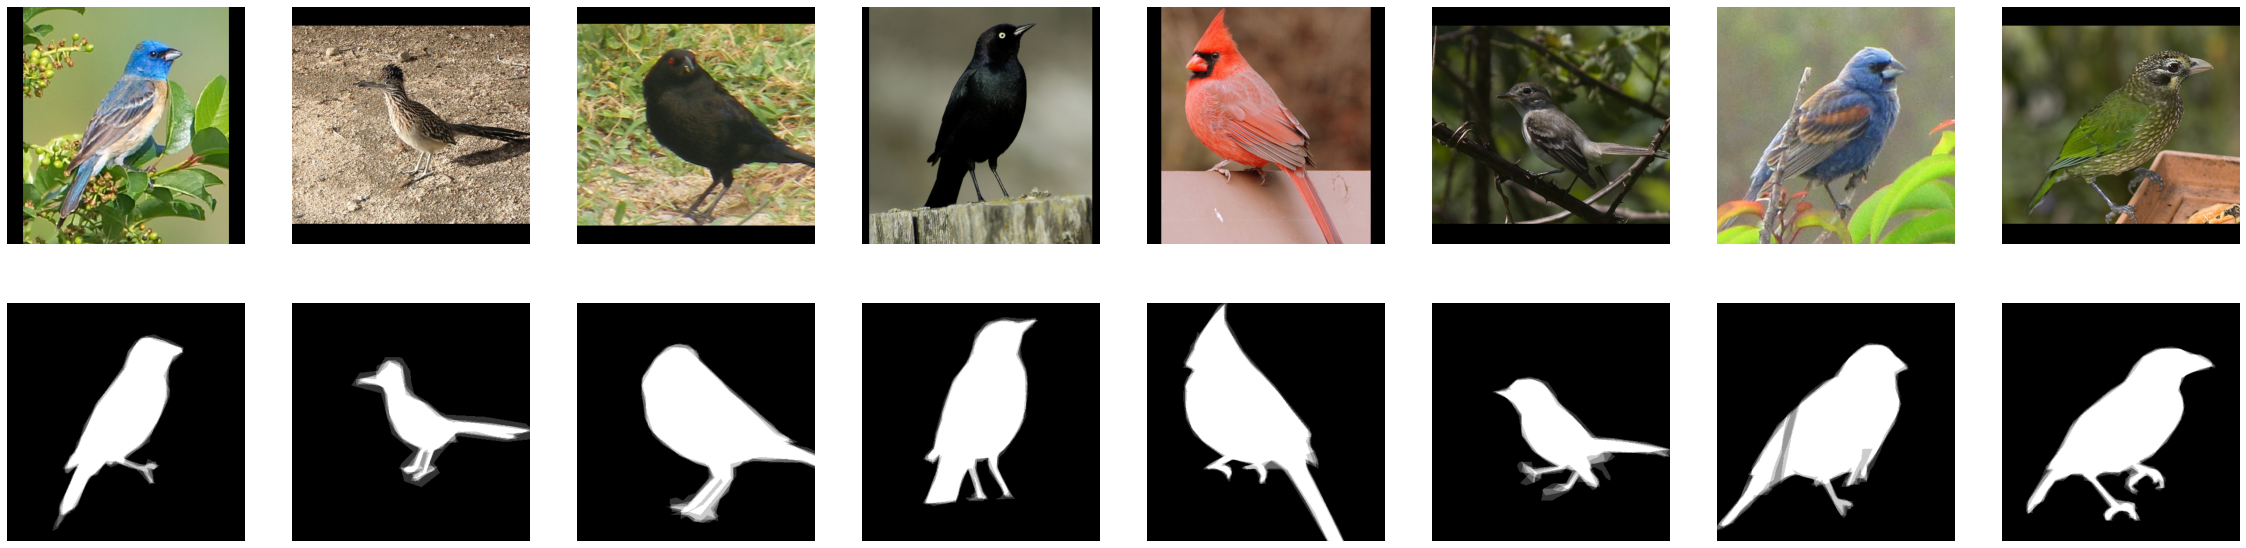

In [130]:
SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)

n_pics_to_show = 8
inputs, masks = next(iter(dataloaders['train']))
fig, ax = plt.subplots(2, n_pics_to_show, figsize=(40, 10))
for i in range(n_pics_to_show):
    pic, label = inputs[i], masks[i]
    label_np = label.data.numpy().transpose(1, 2, 0)
    pic_np = pic.data.numpy().transpose(1, 2, 0)
    ax[0,i].imshow(pic_np, cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].imshow(label_np, cmap='gray')
    ax[1,i].axis('off')

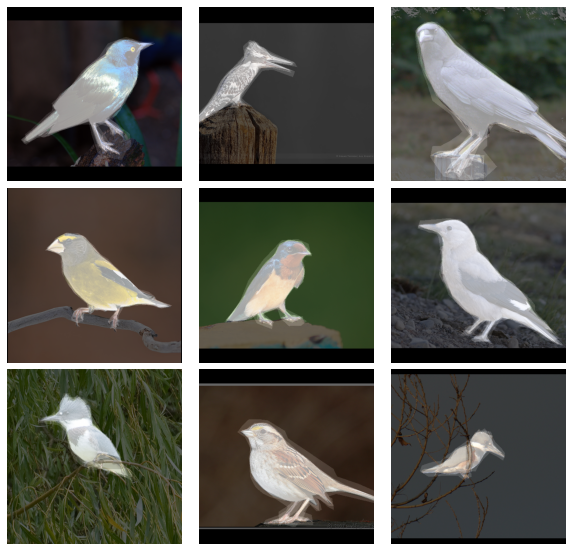

In [169]:
SEED = 21
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)

n_pics_to_show = 9
half = int(n_pics_to_show/3)
inputs, masks = next(iter(dataloaders['train']))
fig, ax = plt.subplots(3, half, figsize=(10, 10))
plt.subplots_adjust(wspace=0.1,hspace=0.001)
for i in range(n_pics_to_show):
    pic, label = inputs[i], masks[i]
    label_np = label.data.numpy().transpose(1, 2, 0)
    pic_np = pic.data.numpy().transpose(1, 2, 0)
    ax[i//half, i%half].imshow(pic_np, cmap='gray')
    ax[i//half, i%half].imshow(label_np, cmap='gray', alpha=0.6)
    ax[i//half, i%half].axis('off')